In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import pandas as pd
import decoupler as dc

In [4]:
sc.set_figure_params(dpi=300)

In [5]:
adata = sc.read("/home/lugli/spuccio/Projects/SP025_NaClTcell/singlecell/Analysis/cluster_integrated_with_DESC.h5ad")

In [6]:
adata.X = adata.layers['scaled']

In [7]:
def run_vis(adata):
    if 'X_emb' in adata.obsm:
        sc.pp.neighbors(adata, use_rep='X_emb',n_neighbors=10, n_pcs=30)
        sc.tl.umap(adata)
    else:
        sc.pp.pca(adata, svd_solver='arpack')
        sc.pp.neighbors(adata)
        sc.tl.umap(adata)

In [8]:
adata.obsm['X_emb'] = adata.obsm['X_Embeded_z'+str(0.5)]
run_vis(adata)

2022-07-07 17:01:50.305453: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-07-07 17:01:50.309352: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-07 17:01:50.309370: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [9]:
markers = dc.get_resource('PanglaoDB')
markers

label,genesymbol,canonical_marker,cell_type,germ_layer,human,human_sensitivity,human_specificity,mouse,mouse_sensitivity,mouse_specificity,ncbi_tax_id,organ,ubiquitiousness
0,CTRB1,False,Enterocytes,Endoderm,True,0.0,0.00439422,True,0.00331126,0.0204803,9606,GI tract,0.017
1,CTRB1,True,Acinar cells,Endoderm,True,1.0,0.000628931,True,0.957143,0.0159201,9606,Pancreas,0.017
2,KLK1,True,Acinar cells,Endoderm,True,0.833333,0.00503145,True,0.314286,0.0128263,9606,Pancreas,0.013
3,KLK1,False,Goblet cells,Endoderm,True,0.588235,0.00503937,True,0.903226,0.0124084,9606,GI tract,0.013
4,KLK1,False,Epithelial cells,Mesoderm,True,0.0,0.00823306,True,0.225806,0.0137585,9606,Epithelium,0.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8472,SLC14A1,True,Urothelial cells,Mesoderm,True,0.0,0.0181704,True,0.0,0.0,9606,Urinary bladder,0.008
8473,UPK3A,True,Urothelial cells,Mesoderm,True,0.0,0.0,True,0.0,0.0,9606,Urinary bladder,0.0
8474,UPK1A,True,Urothelial cells,Mesoderm,True,0.0,0.0,True,0.0,0.0,9606,Urinary bladder,0.0
8475,UPK2,True,Urothelial cells,Mesoderm,True,0.0,0.0,True,0.0,0.0,9606,Urinary bladder,0.0


In [10]:
# Filter by canonical_marker and human
markers = markers[(markers['mouse']=='True')&(markers['canonical_marker']=='True')]

# Remove duplicated entries
markers = markers[~markers.duplicated(['cell_type', 'genesymbol'])]
markers

label,genesymbol,canonical_marker,cell_type,germ_layer,human,human_sensitivity,human_specificity,mouse,mouse_sensitivity,mouse_specificity,ncbi_tax_id,organ,ubiquitiousness
1,CTRB1,True,Acinar cells,Endoderm,True,1.0,0.000628931,True,0.957143,0.0159201,9606,Pancreas,0.017
2,KLK1,True,Acinar cells,Endoderm,True,0.833333,0.00503145,True,0.314286,0.0128263,9606,Pancreas,0.013
5,KLK1,True,Principal cells,Mesoderm,True,0.0,0.00814536,True,0.285714,0.0140583,9606,Kidney,0.013
7,KLK1,True,Plasmacytoid dendritic cells,Mesoderm,True,0.0,0.00820189,True,1.0,0.0129136,9606,Immune system,0.013
8,KLK1,True,Endothelial cells,Mesoderm,True,0.0,0.00841969,True,0.0,0.0149153,9606,Vasculature,0.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8472,SLC14A1,True,Urothelial cells,Mesoderm,True,0.0,0.0181704,True,0.0,0.0,9606,Urinary bladder,0.008
8473,UPK3A,True,Urothelial cells,Mesoderm,True,0.0,0.0,True,0.0,0.0,9606,Urinary bladder,0.0
8474,UPK1A,True,Urothelial cells,Mesoderm,True,0.0,0.0,True,0.0,0.0,9606,Urinary bladder,0.0
8475,UPK2,True,Urothelial cells,Mesoderm,True,0.0,0.0,True,0.0,0.0,9606,Urinary bladder,0.0


In [11]:
adata = adata[:, adata.var.highly_variable]

In [14]:
names_upper = [name.upper() for name in adata.var.index]
adata.var.index = names_upper

In [15]:
dc.run_ora(mat=adata, net=markers, source='cell_type', target='genesymbol', min_n=3, verbose=True,use_raw=False)

Running ora on mat with 37525 samples and 1725 targets for 88 sources.


100%|██████████| 37525/37525 [00:14<00:00, 2556.19it/s]


In [16]:
adata.obsm['ora_estimate']

source,Acinar cells,Adipocytes,Alpha cells,Astrocytes,B cells,B cells memory,B cells naive,Basophils,Bergmann glia,Beta cells,...,Schwann cells,Sebocytes,Sertoli cells,Smooth muscle cells,T cells,T follicular helper cells,T helper cells,T regulatory cells,Tanycytes,Thymocytes
AAACCCAAGACCATTC-1-0,-0.000000,1.198448,-0.000000,-0.000000,-0.000000,0.969715,1.002637,2.666057,-0.000000,1.666276,...,-0.000000,-0.000000,-0.000000,-0.000000,4.611607,-0.0,-0.000000,-0.000000,-0.000000,1.329437
AAACCCAAGCCTAGGA-1-0,-0.000000,-0.000000,1.886258,2.849461,2.279144,3.716074,2.314132,6.233528,-0.000000,1.666276,...,1.522012,-0.000000,3.411959,-0.000000,1.903536,-0.0,-0.000000,-0.000000,-0.000000,1.329437
AAACCCAAGGTAACTA-1-0,1.522012,1.198448,1.886258,2.849461,3.767955,0.969715,1.002637,-0.000000,-0.000000,1.666276,...,-0.000000,-0.000000,3.411959,1.588027,0.805517,-0.0,-0.000000,-0.000000,-0.000000,-0.000000
AAACCCACACAAGCTT-1-0,1.522012,2.722821,-0.000000,1.258742,-0.000000,0.969715,-0.000000,1.171345,-0.000000,-0.000000,...,1.522012,-0.000000,3.411959,1.588027,-0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.000000
AAACCCACAGAAGTTA-1-0,-0.000000,-0.000000,-0.000000,-0.000000,0.985829,0.969715,1.002637,2.666057,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,0.805517,-0.0,-0.000000,-0.000000,-0.000000,1.329437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTGTGTGTT-1-3,-0.000000,4.458006,1.886258,-0.000000,0.985829,0.969715,1.002637,1.171345,1.886258,3.731717,...,-0.000000,-0.000000,1.522012,1.588027,0.805517,-0.0,1.258742,-0.000000,1.886258,-0.000000
TTTGTTGGTTAGGACG-1-3,1.522012,1.198448,-0.000000,6.634964,0.985829,-0.000000,-0.000000,-0.000000,1.886258,3.731717,...,-0.000000,-0.000000,-0.000000,-0.000000,0.805517,-0.0,-0.000000,1.329437,1.886258,-0.000000
TTTGTTGTCAATCTTC-1-3,-0.000000,1.198448,-0.000000,-0.000000,0.985829,-0.000000,-0.000000,1.171345,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,1.588027,4.611607,-0.0,4.656916,-0.000000,-0.000000,-0.000000
TTTGTTGTCGATTCCC-1-3,-0.000000,4.458006,-0.000000,2.849461,-0.000000,0.969715,1.002637,4.369197,1.886258,1.666276,...,-0.000000,1.666276,-0.000000,-0.000000,1.903536,-0.0,-0.000000,-0.000000,1.886258,4.893061


In [17]:
acts = dc.get_acts(adata, obsm_key='ora_estimate')
acts


AnnData object with n_obs × n_vars = 37525 × 88
    obs: 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_disaggregation_score', 'pct_counts_disaggregation_score', 'total_counts_rb', 'pct_counts_rb', 'n_genes', 'SampleID', 'Treatment', 'MouseID', 'batch', 'S_score', 'G2M_score', 'phase', 'desc_0.2', 'desc_0.3', 'desc_0.4', 'desc_0.5', 'desc_0.6', 'desc_0.7', 'desc_0.8', 'desc_0.9', 'desc_1.0', 'desc_1.2'
    uns: 'hvg', 'pca', 'prob_matrix0.2', 'prob_matrix0.3', 'prob_matrix0.4', 'prob_matrix0.5', 'prob_matrix0.6', 'prob_matrix0.7', 'prob_matrix0.8', 'prob_matrix0.9', 'prob_matrix1.0', 'prob_matrix1.2', 'umap', 'neighbors'
    obsm: 'X_Embeded_z0.2', 'X_Embeded_z0.3', 'X_Embeded_z0.4', 'X_Embeded_z0.5', 'X_Embeded_z0.6', 'X_Embeded_z0.7', 'X_Embeded_z0.8', 'X_Embeded_z0.9', 'X_Embeded_z1.0', 'X_Embeded_z1.2', 'X_pca', 'X_umap', 'X_umap0.2', 'X_umap0.3', 'X_umap0.4', 'X_umap0.5', 'X_umap0.6', 'X_umap0.7', 'X_u

In [18]:
mean_enr = dc.summarize_acts(acts, groupby='desc_0.5', min_std=1)
mean_enr

,B cells,B cells naive,Chondrocytes,Dendritic cells,Gamma delta T cells,Kupffer cells,Macrophages,Megakaryocytes,Microglia,Monocytes,NK cells,Neutrophils,Plasmacytoid dendritic cells,Platelets,T cells,T helper cells,T regulatory cells,Thymocytes
0,1.108814,1.032396,1.196501,3.429696,0.570041,2.835834,7.995592,1.041119,4.136937,3.462028,0.876791,4.477716,0.857107,2.956841,0.480193,0.322796,0.771543,0.573893
1,1.228408,1.579234,2.954001,4.372823,3.280012,2.674648,6.877660,2.955627,5.376399,4.164214,5.199198,6.988559,2.008631,3.653699,4.025386,0.763945,0.703628,1.246841
10,2.848858,2.094770,1.404597,4.030966,1.545686,3.144771,7.160459,1.739048,4.839773,2.941527,1.987280,4.242966,1.321454,4.039358,1.550622,1.187034,0.546566,0.676891
11,2.616774,0.773383,0.170822,5.453801,0.422333,0.783865,4.447924,0.860071,0.595060,0.819095,0.875075,0.346079,2.305820,0.737987,1.919264,0.400517,0.815998,0.849744
12,0.798593,0.728657,1.705260,3.332934,0.558384,2.823878,9.580682,1.632675,3.670141,2.568820,0.804865,4.823314,0.608557,3.609872,0.624835,0.377096,0.712482,0.462153
13,5.847179,5.052736,2.094771,2.167161,0.623350,1.166196,2.681405,0.414042,1.584894,1.179198,1.222332,0.713040,15.414055,0.652900,1.551111,0.708733,0.717661,1.179989
2,1.126897,1.324359,1.036867,3.091638,0.761967,2.003136,5.565266,1.152439,2.417698,4.910611,1.053248,4.691095,0.763924,3.411657,0.512261,0.484462,0.421299,0.497953
3,0.820362,0.892018,0.160547,1.542321,4.831391,0.053835,0.265984,1.068568,0.317119,0.907837,12.340421,0.337708,1.036103,1.675381,5.073028,1.198114,0.227024,0.600751
4,0.979867,1.022913,0.166162,1.606663,3.225906,0.045314,0.678896,1.079254,0.531802,0.692218,6.209899,0.148098,1.728661,1.489359,10.724421,2.014673,0.848833,2.581711
5,1.801616,1.483239,0.716411,4.341554,1.929593,1.810412,5.852903,0.669253,2.547807,2.231352,1.822387,1.454378,1.833616,1.882386,1.158898,0.597463,0.562933,0.645281


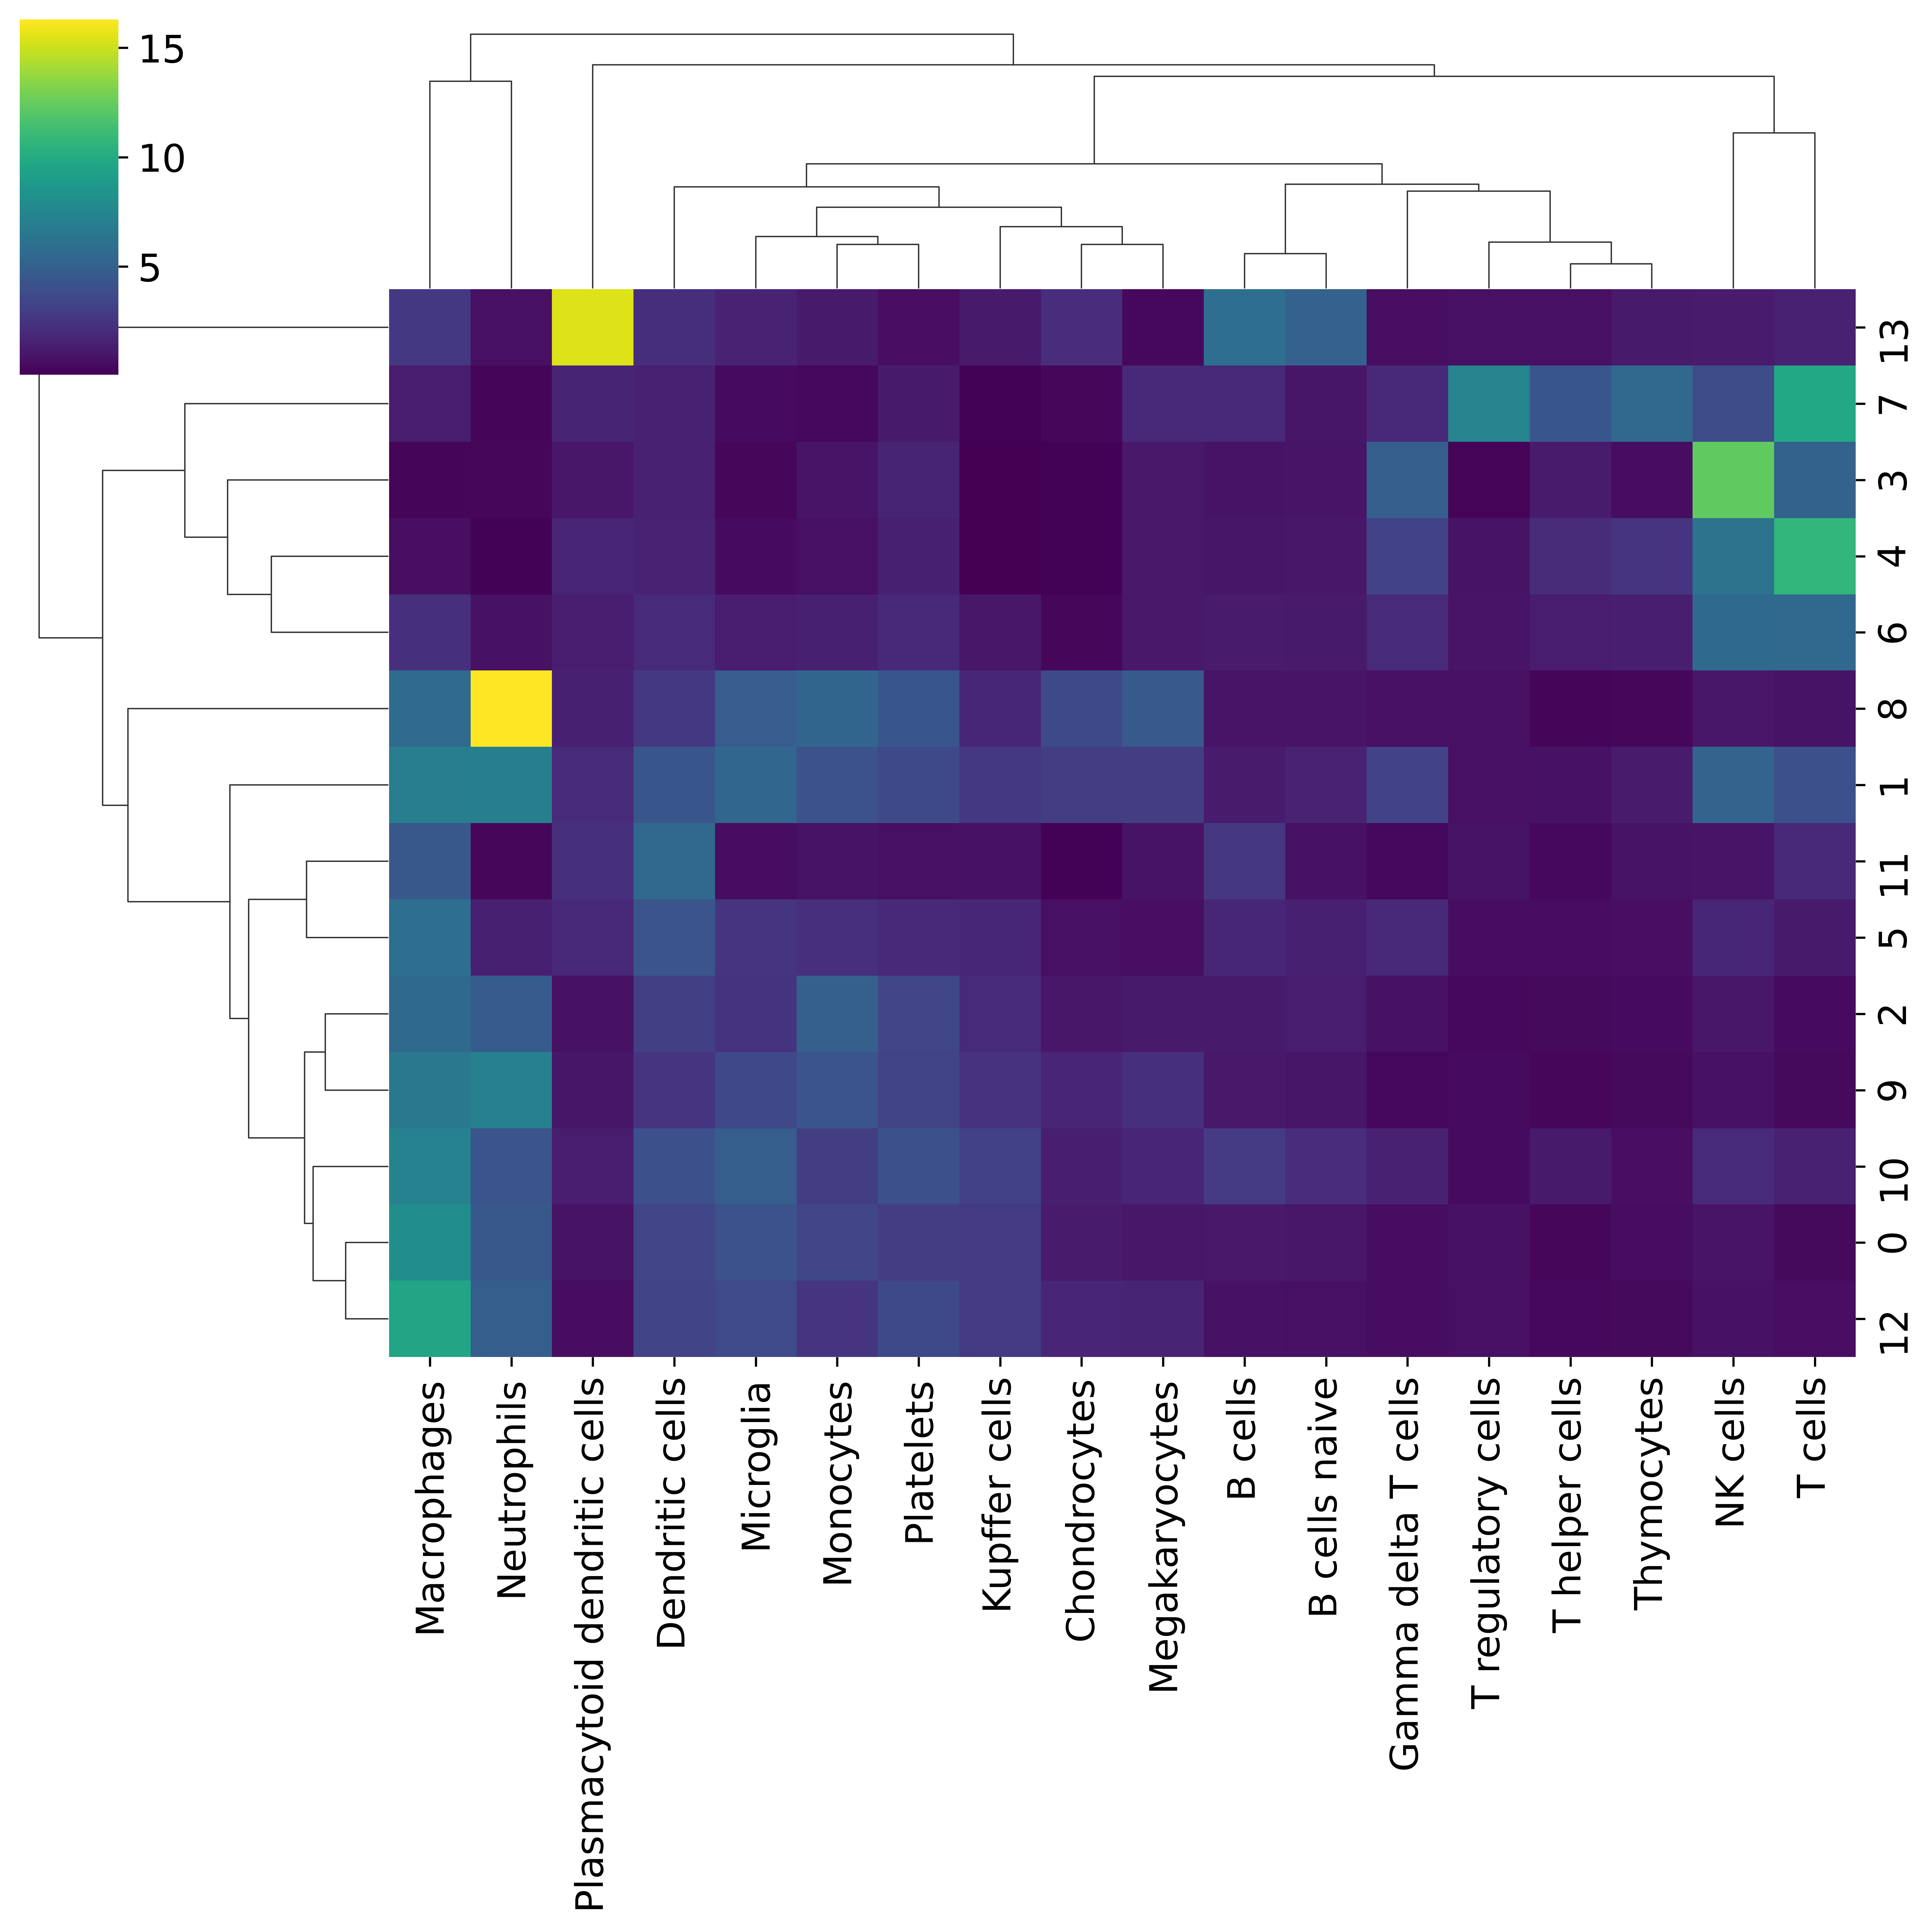

In [19]:
sns.clustermap(mean_enr, xticklabels=mean_enr.columns, cmap='viridis')
plt.show()

In [20]:
annotation_dict = dc.assign_groups(mean_enr)
annotation_dict

{'0': 'Macrophages',
 '1': 'Neutrophils',
 '10': 'Macrophages',
 '11': 'Dendritic cells',
 '12': 'Macrophages',
 '13': 'Plasmacytoid dendritic cells',
 '2': 'Macrophages',
 '3': 'NK cells',
 '4': 'T cells',
 '5': 'Macrophages',
 '6': 'NK cells',
 '7': 'T cells',
 '8': 'Neutrophils',
 '9': 'Neutrophils'}

In [21]:
# Add cell type column based on annotation
adata.obs['cell_type'] = [annotation_dict[str(clust)] for clust in adata.obs[]]


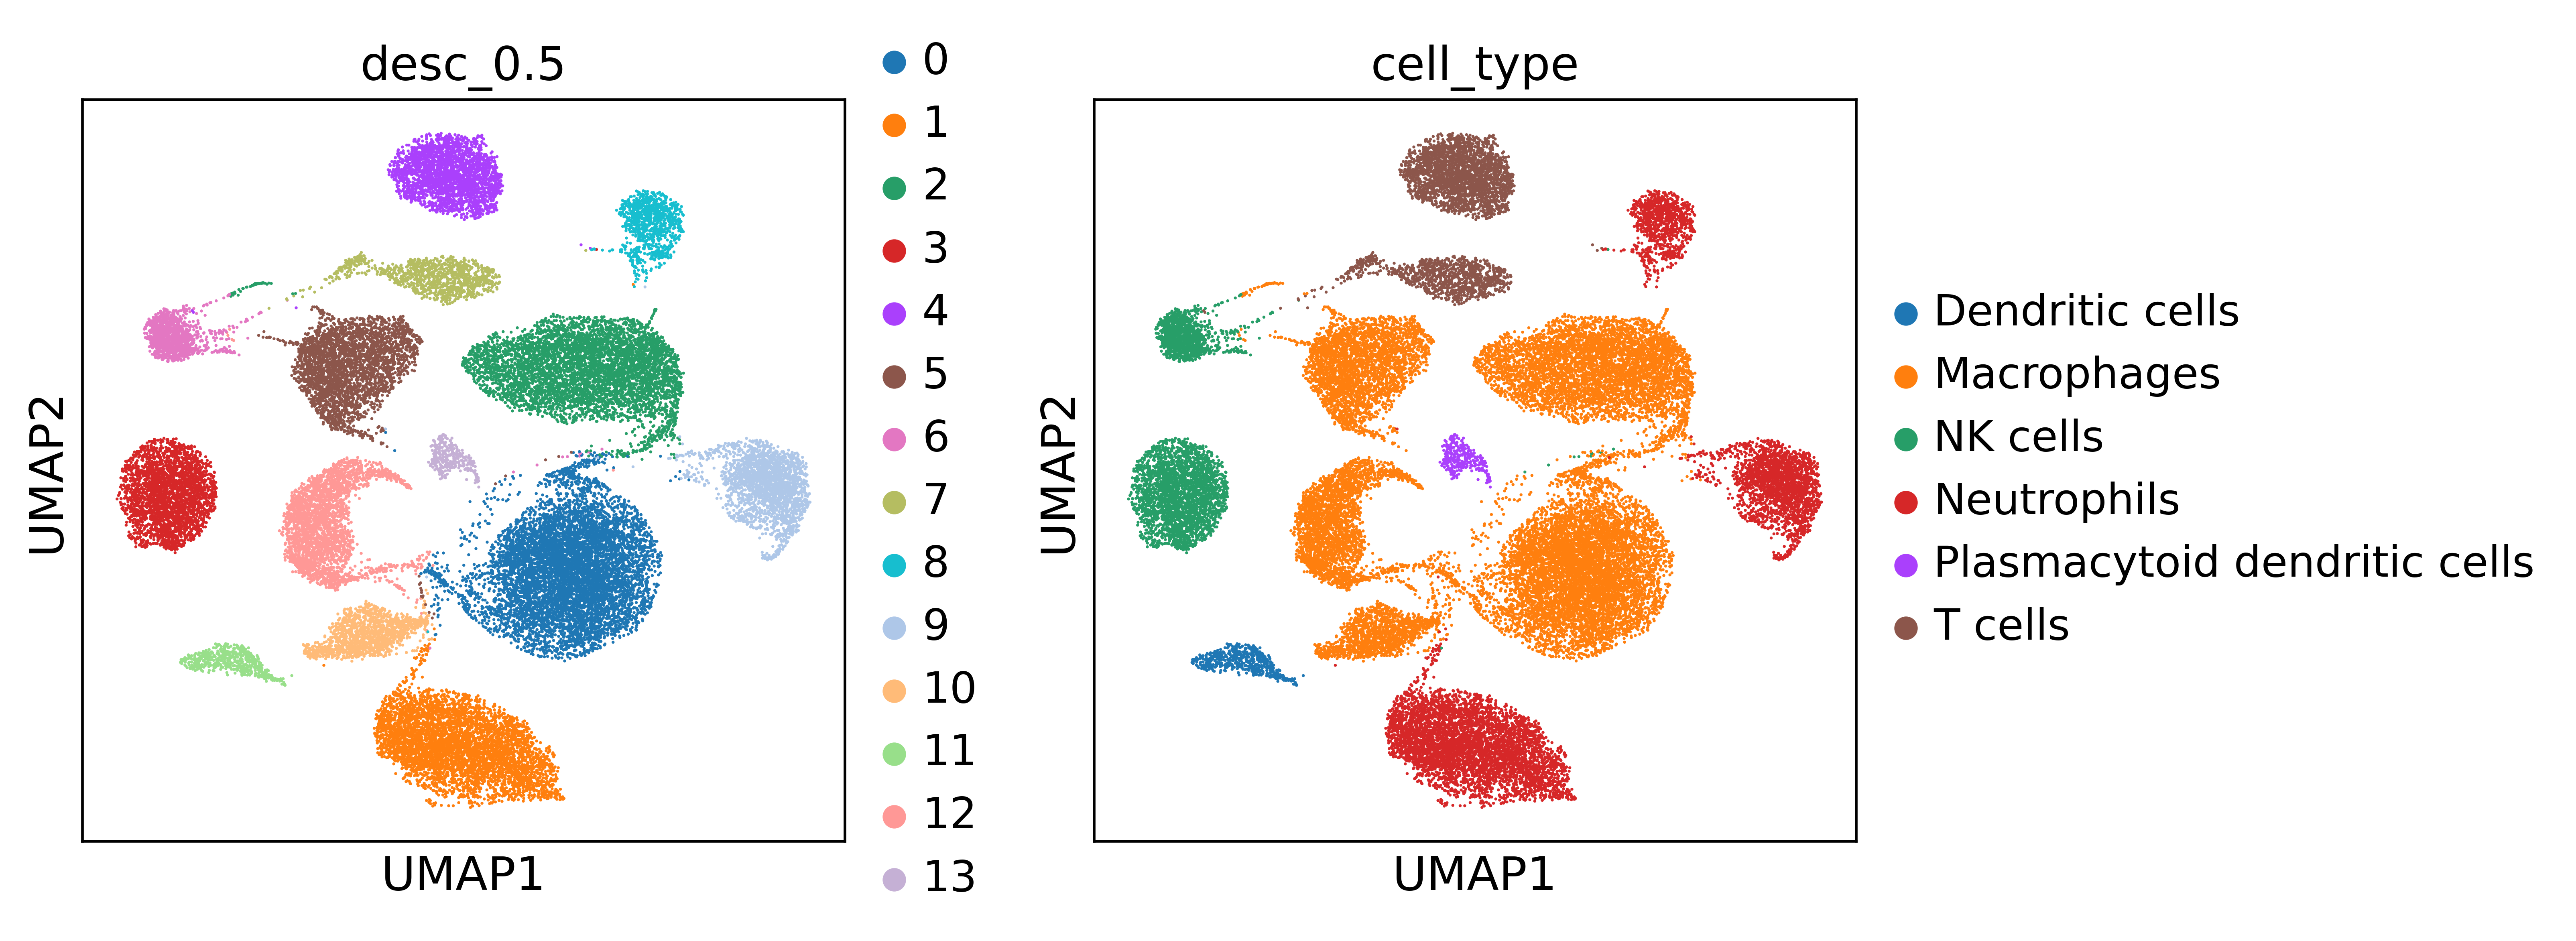

In [23]:
# Visualize
sc.pl.umap(adata, color=['desc_0.5','cell_type'])